# Inicio

## Links

https://ricardolessatissi.medium.com/insights-com-dados-com-a-biblioteca-sweetviz-ae4c8f2ff05e

## Libs

In [2]:
import os, sys

import pandas as pd
import numpy as np
from IPython.display import display, HTML

#Visualization
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly
import plotly.express as px

# EDA
import sweetviz as sv

import warnings 
warnings.filterwarnings("ignore")


In [3]:
# ambiente virtual
env_path = sys.prefix
env_name = os.path.basename(env_path)
print(f'O nome do ambiente virtual é: {env_name}')
print('Versao Python:', sys.version)
print('Versao Pandas:', pd.__version__)
print('Versao Matplotlib:', matplotlib.__version__)
print('Versao SweetViz:', sv.__version__)

O nome do ambiente virtual é: botcamp
Versao Python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Versao Pandas: 2.0.3
Versao Matplotlib: 3.7.2
Versao SweetViz: 2.3.1


## Parametros

In [4]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('max_colwidth', 1000) # tamanho das colunas para exibição do conteúdo de textos longos

np.set_printoptions(threshold=1000)

# Ajustar a largura para 100% ou qualquer outro valor
display(HTML("<style>.container { width:75% !important; }</style>"))

# Formatar numeros float (2 casas decimais)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

# Formatações para gráficos
sns.set(style="darkgrid") #cor da area dos plots
figsize = (10,10)

random_state = 123
vlr_salario_minimo = 1412

In [5]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
#print(color.BOLD + 'Hello World !' + color.END)

# Funcoes

## Checar dataframe

In [7]:
def checar_df(df):
    print(color.BOLD  + color.RED + 'Informações do dataframe: ' + color.END)
    df.info(verbose=True, show_counts=True)
    
    print(color.BOLD + color.RED + "\nNúmero de observacoes na base de dados: " + color.END, df.shape[0])
    print('Total de ', df.shape[1], 'Colunas: ', df.columns.values.tolist())
    
    print(color.BOLD + color.RED + "\nNúmero de valores unicos (Não inclui NaN): " + color.END)
    display(df.nunique(dropna=True).to_frame(name='Contagem Unicos').sort_index())
    
    print(color.BOLD + color.RED + "Número de valores nulos:" + color.END)
    display(df.isnull().sum().sort_values(ascending=False).to_frame(name='Contagem Nulos').sort_index())

# Captura dados - familias

## Ler csv

In [10]:
%%time

list_col_string = ['cd_ibge','id_familia']
dict_dtype = {column: 'str' for column in list_col_string}

df_fam_t = pd.read_csv('./dados/base_amostra_familia_201812_tratado.csv', sep='|', 
                       dtype=dict_dtype,
                       low_memory=False)

col_dates = ['dat_cadastramento_fam', 'dat_alteracao_fam', 'dat_atualizacao_familia']
for c in col_dates:
    df_fam_t[c] = pd.to_datetime(df_fam_t[c], errors='coerce')


CPU times: total: 15.5 s
Wall time: 16.3 s


## Checar dataframe

In [12]:
checar_df(df_fam_t)

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158012 entries, 0 to 4158011
Data columns (total 32 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   cd_ibge                        4158012 non-null  object        
 1   estrato                        4158012 non-null  int64         
 2   classf                         4158012 non-null  int64         
 3   id_familia                     4158012 non-null  object        
 4   dat_cadastramento_fam          4158012 non-null  datetime64[ns]
 5   dat_alteracao_fam              4158012 non-null  datetime64[ns]
 6   vlr_renda_media_fam            4158012 non-null  float64       
 7   dat_atualizacao_familia        4158012 non-null  datetime64[ns]
 8   cod_local_domic_fam            4158012 non-null  int64         
 9   cod_especie_domic_fam          4158012 non-null  int64         
 10  qtd_comodos_domic_fam      

,Contagem Unicos
anos_decorridos,1362
cd_ibge,5534
classf,3
cod_abaste_agua_domic_fam,4
cod_agua_canalizada_fam,2
cod_banheiro_domic_fam,1
cod_calcamento_domic_fam,3
cod_destino_lixo_domic_fam,6
cod_escoa_sanitario_domic_fam,6
cod_especie_domic_fam,1


Número de valores nulos:


,Contagem Nulos
anos_decorridos,0
cd_ibge,0
classf,0
cod_abaste_agua_domic_fam,0
cod_agua_canalizada_fam,0
cod_banheiro_domic_fam,0
cod_calcamento_domic_fam,0
cod_destino_lixo_domic_fam,0
cod_escoa_sanitario_domic_fam,0
cod_especie_domic_fam,0


# Exploração complementar com SweetViz

In [13]:
%%time
dados = sv.analyze(df_fam_t)

                                             |                                                   | [  0%]   00…

CPU times: total: 20min 34s
Wall time: 20min 35s



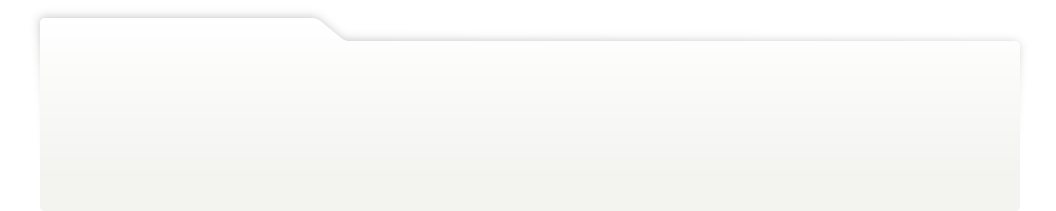
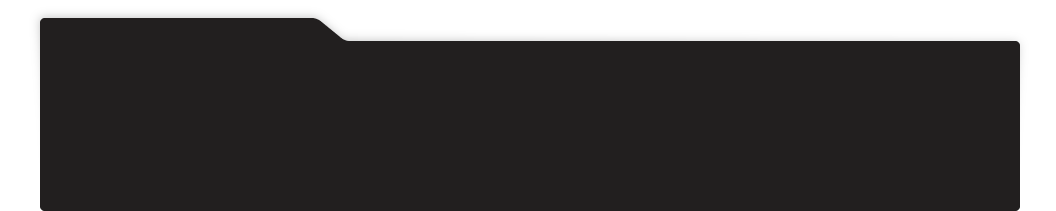
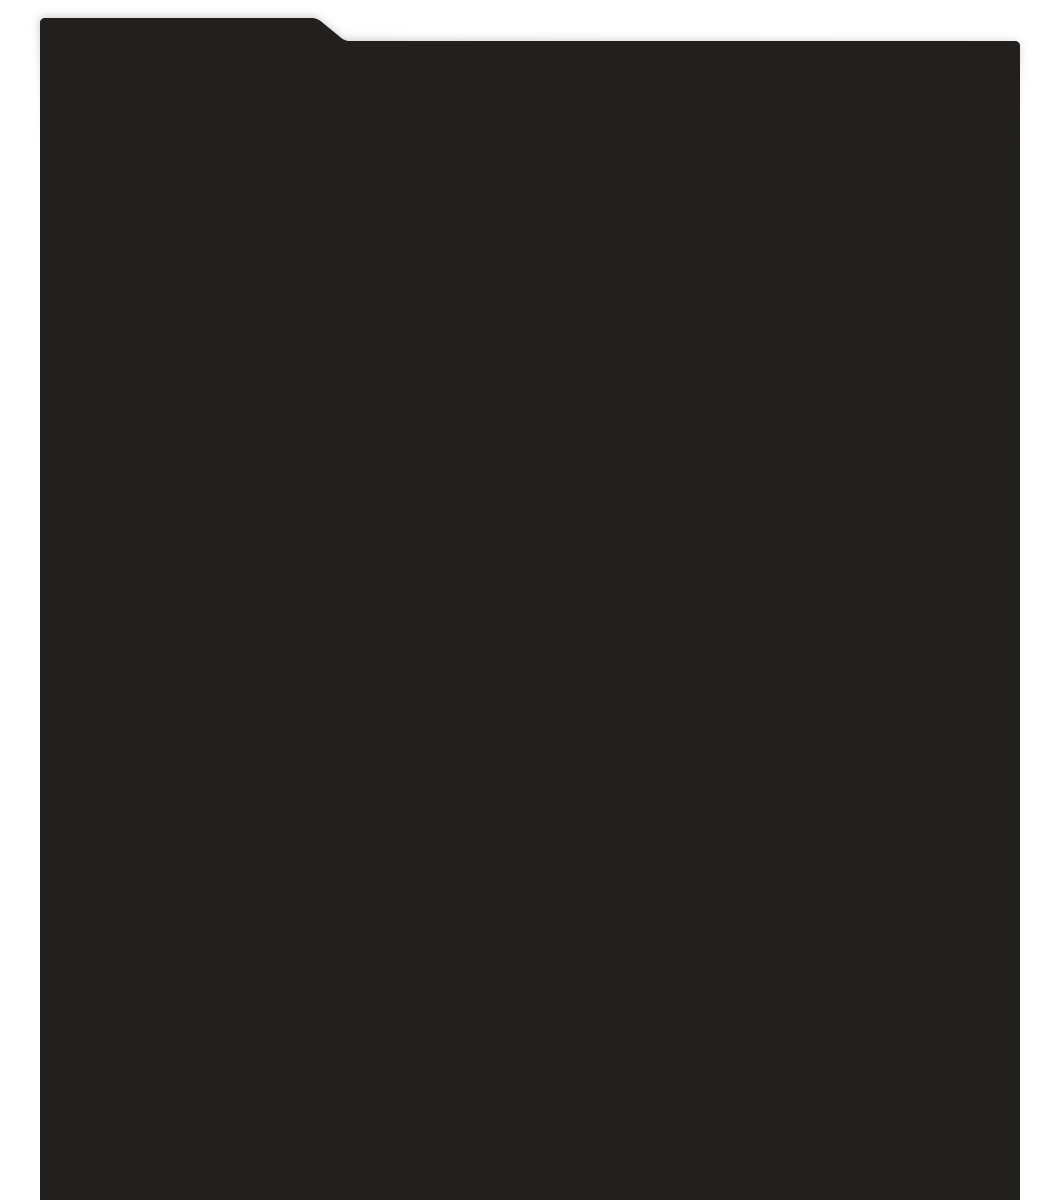
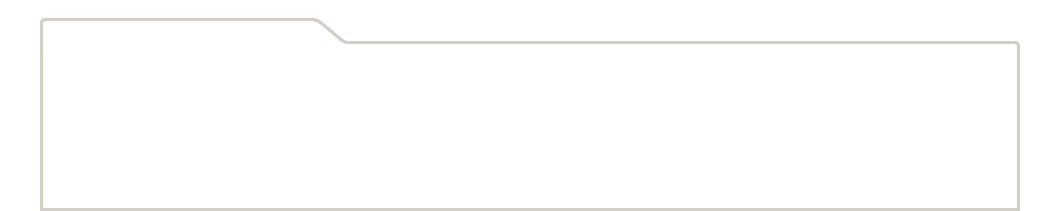
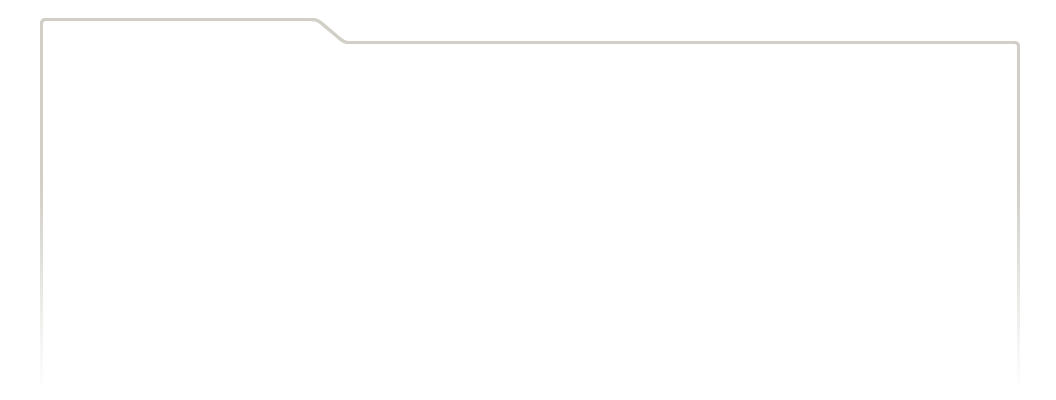
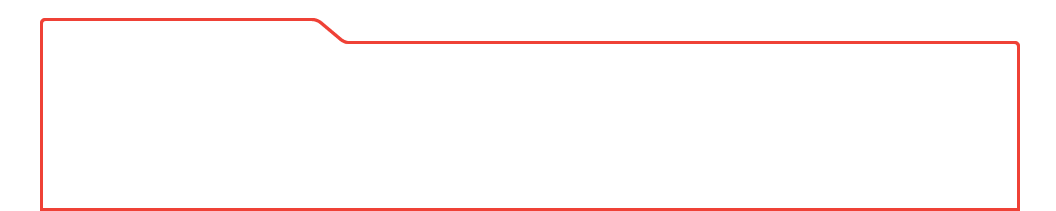
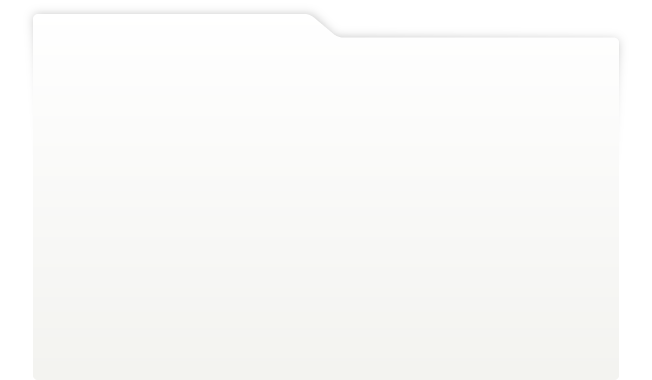
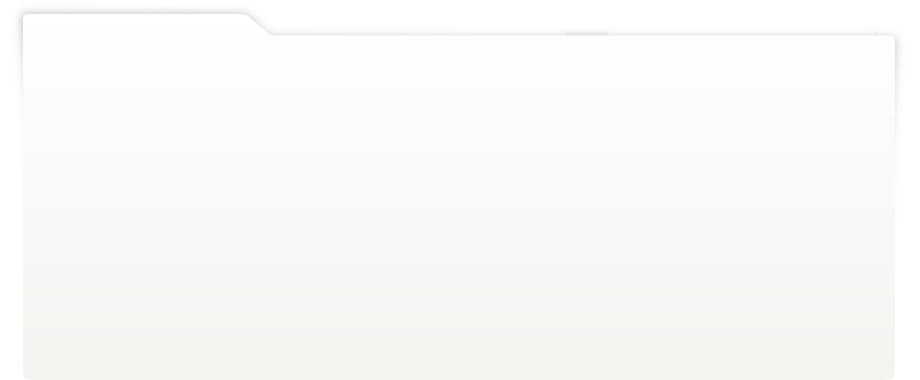
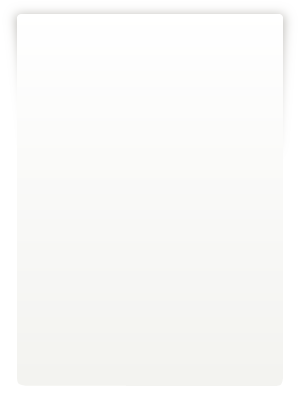
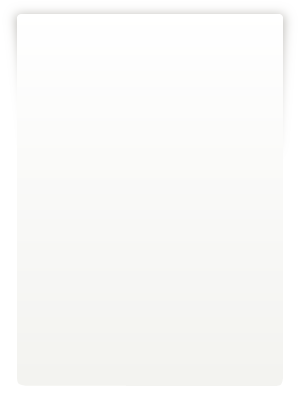
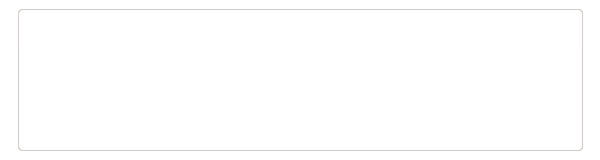
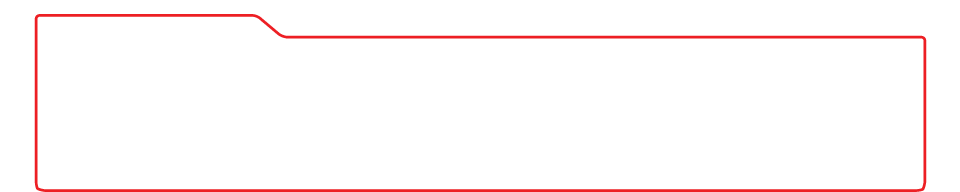
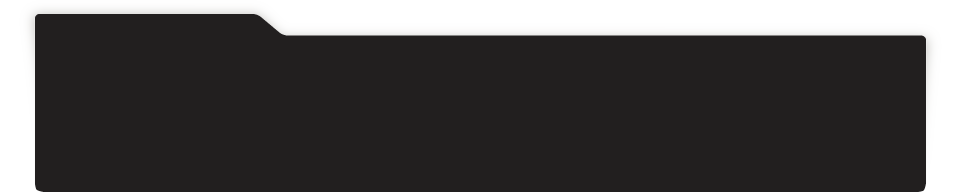
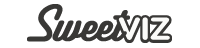
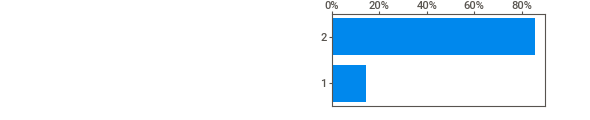
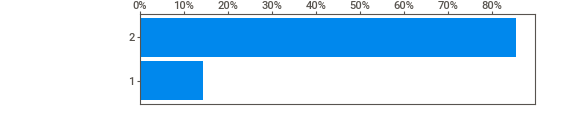
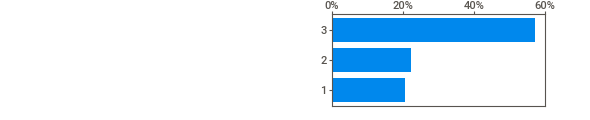
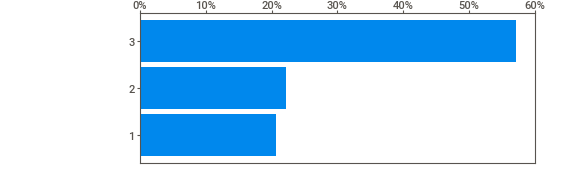
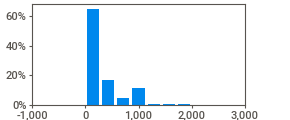
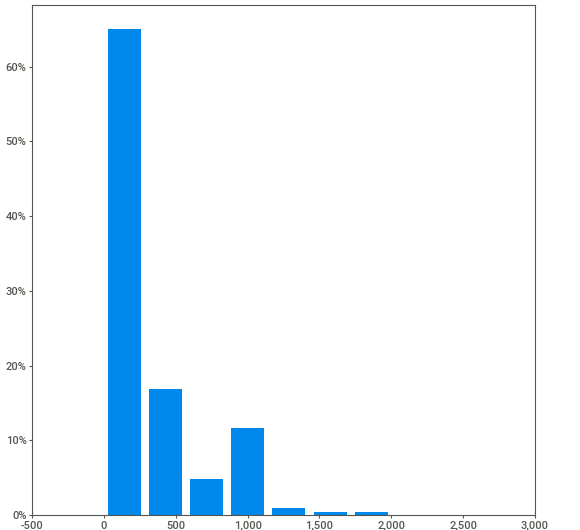
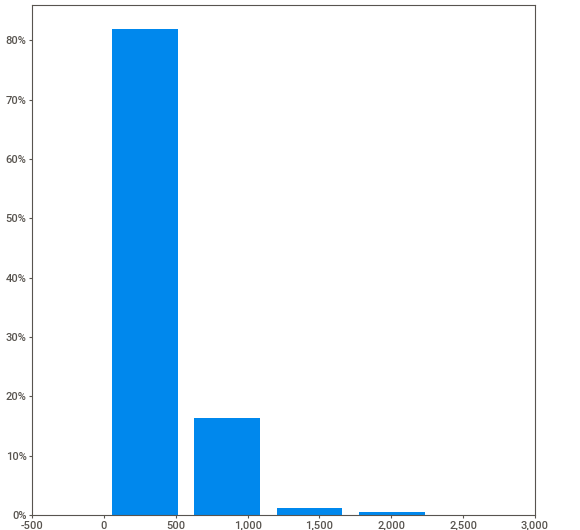
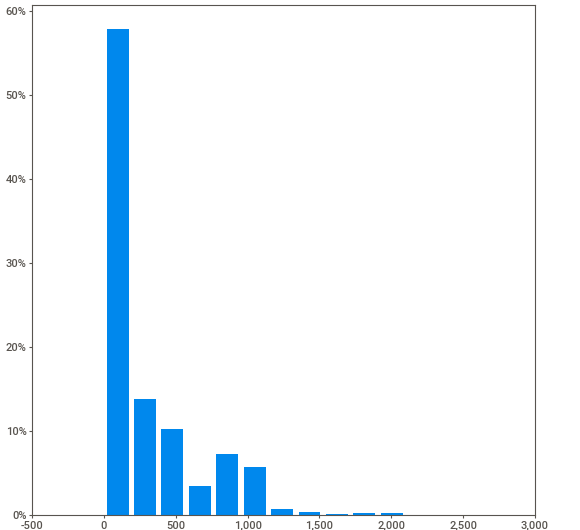
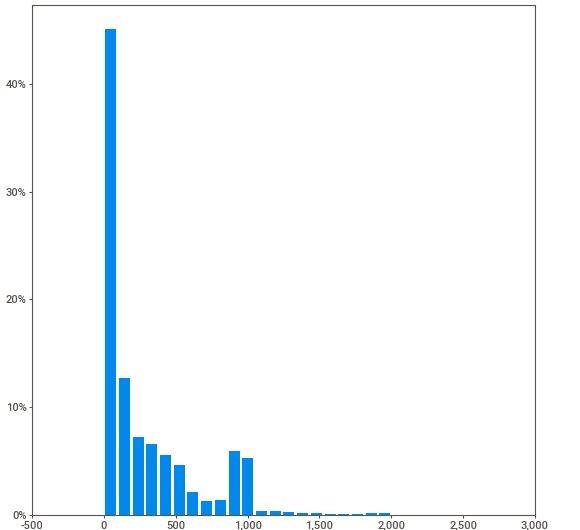
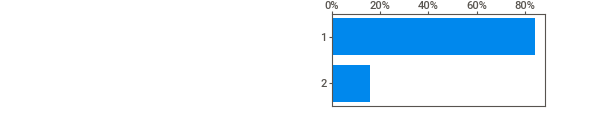
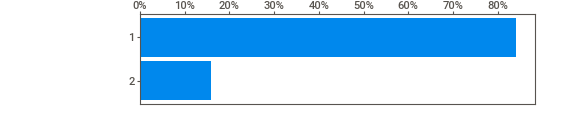
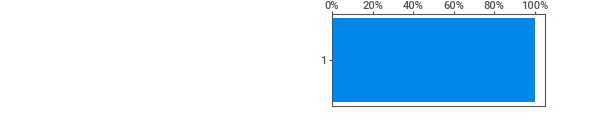
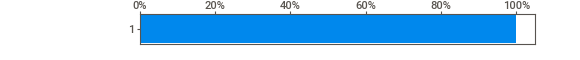
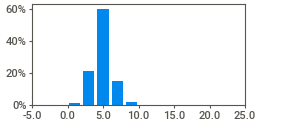
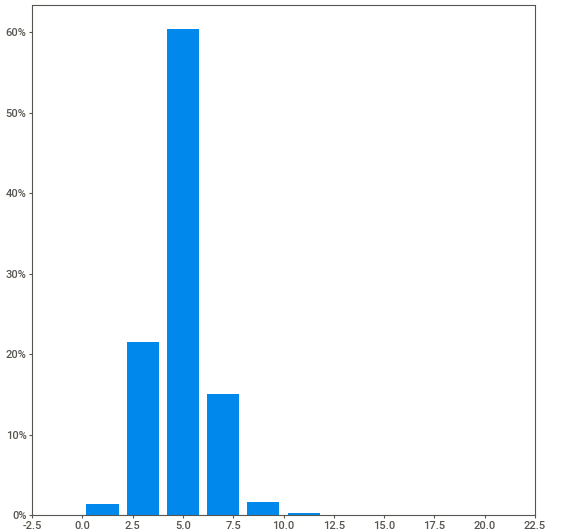
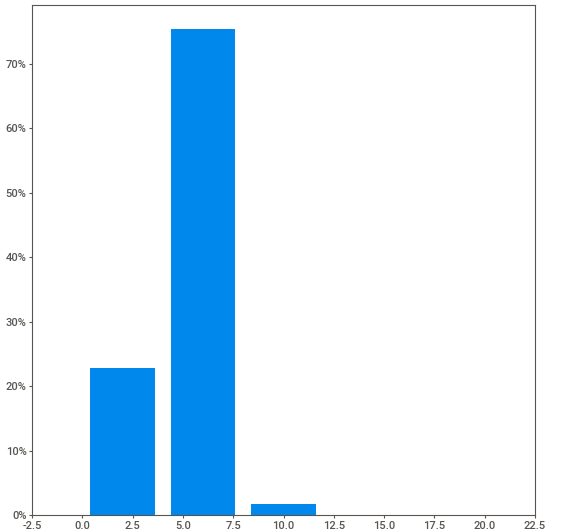
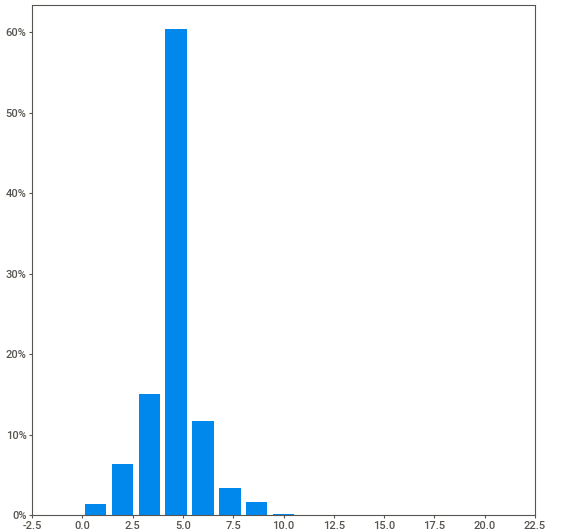
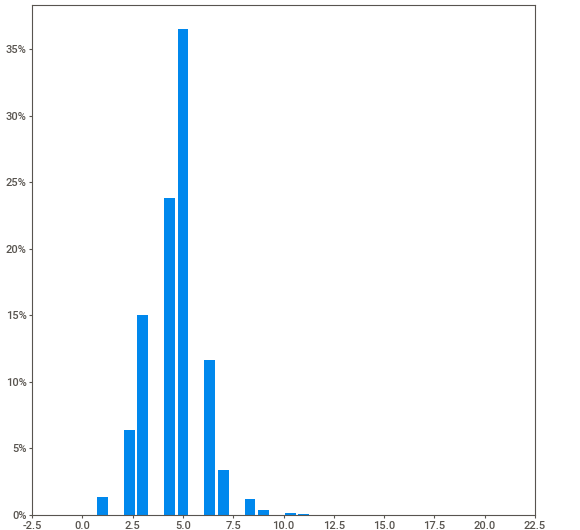
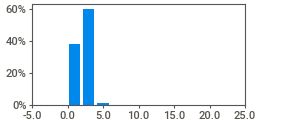
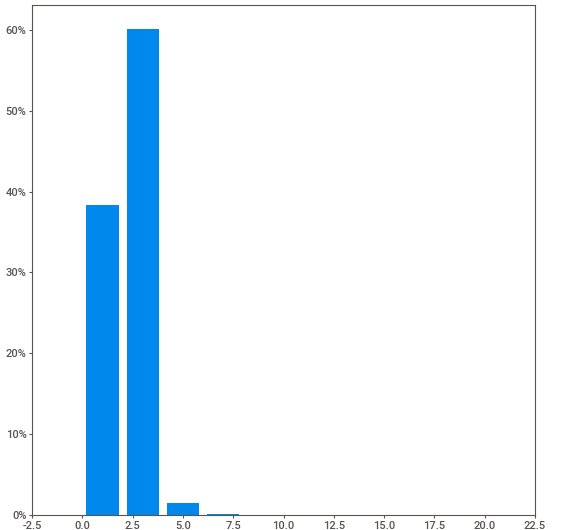
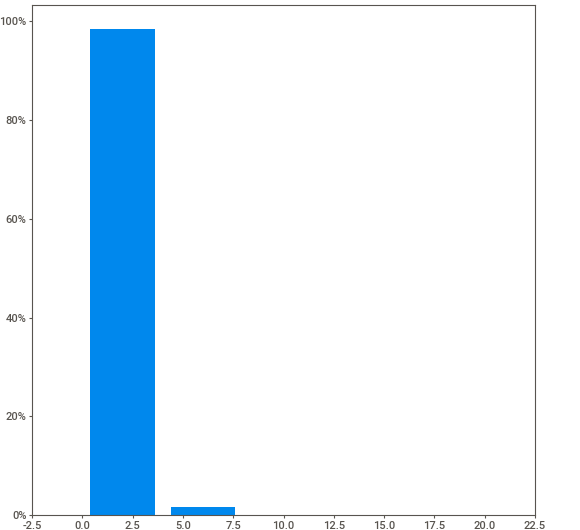
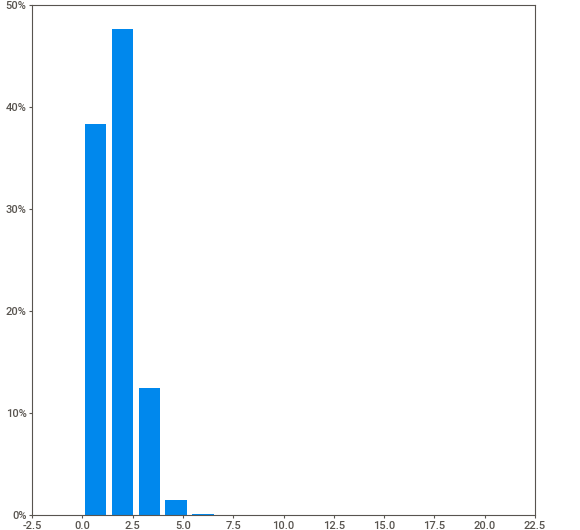
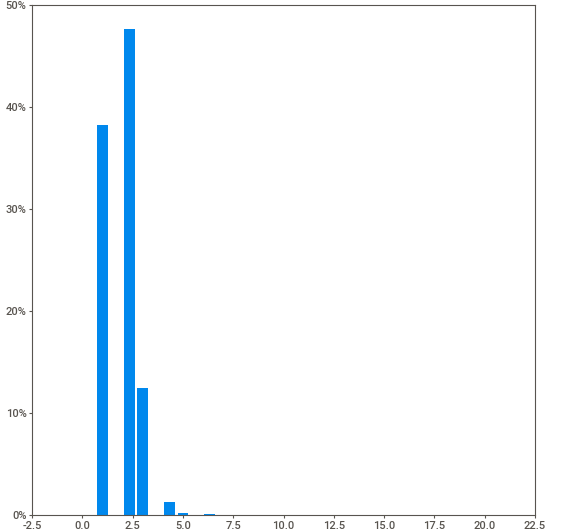
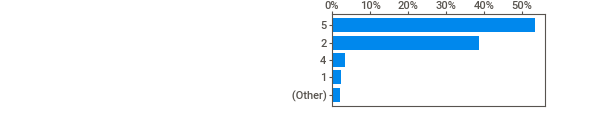
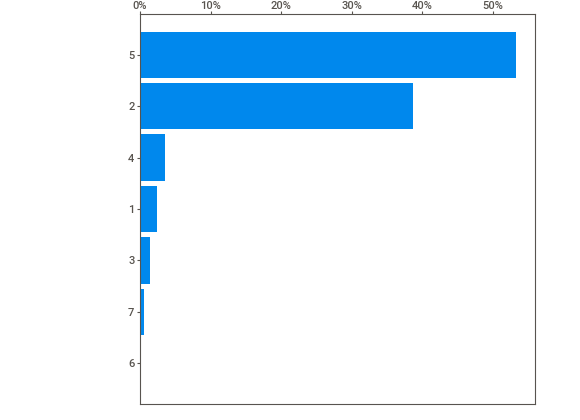
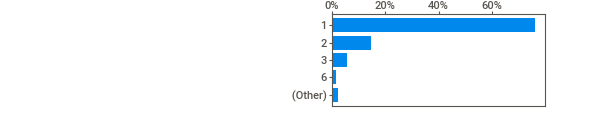
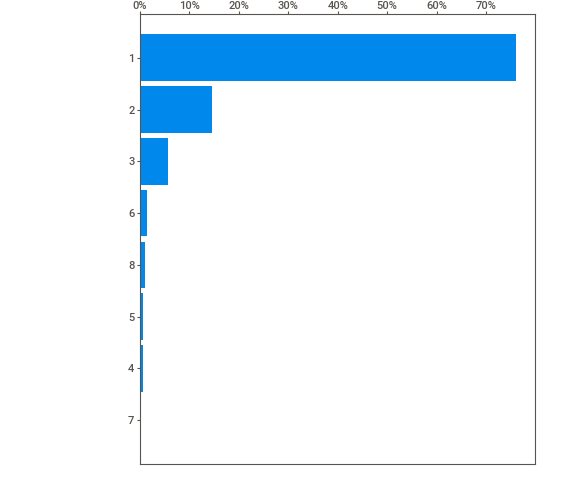
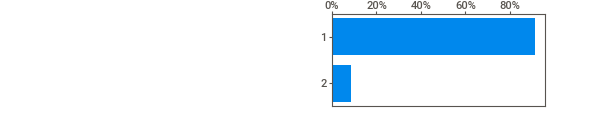
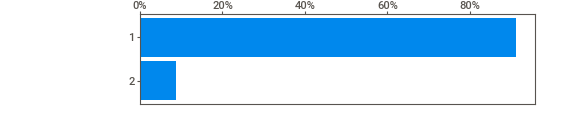
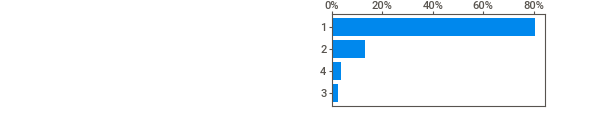
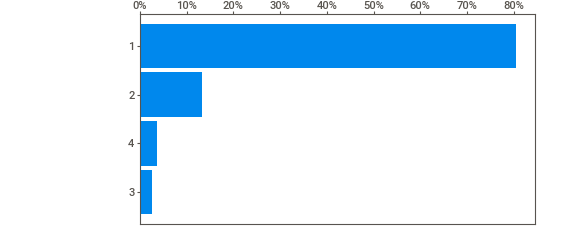
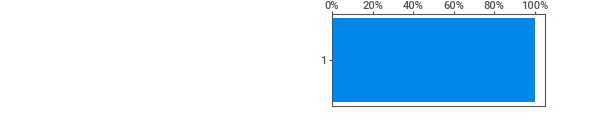
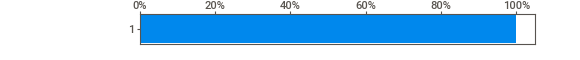
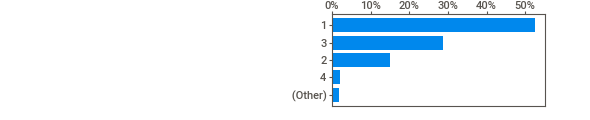
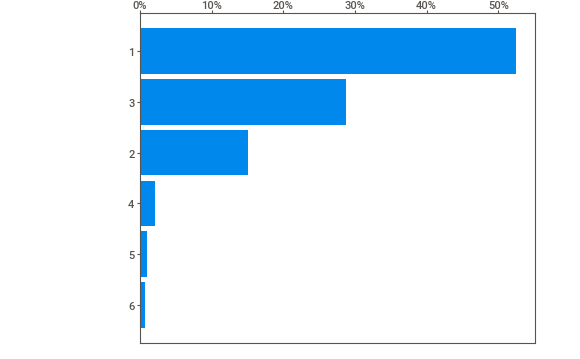
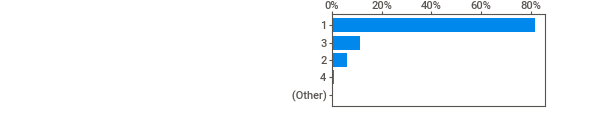
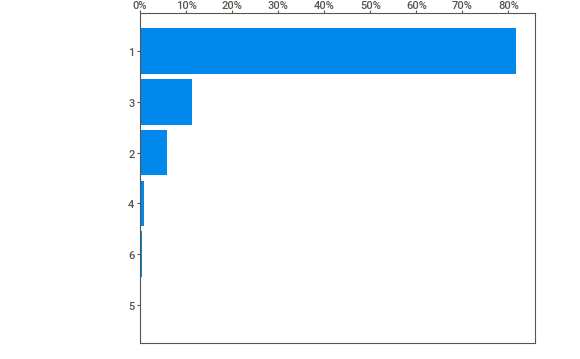
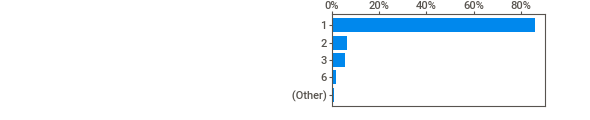
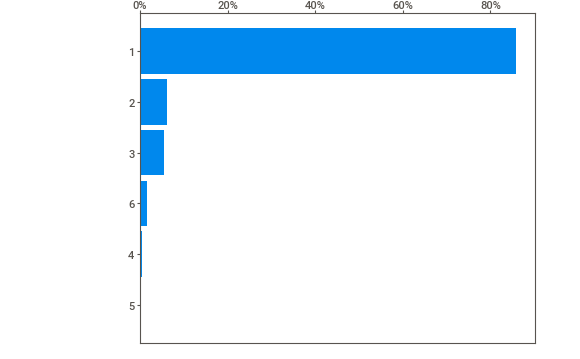
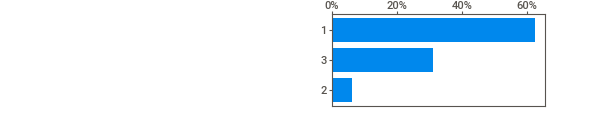
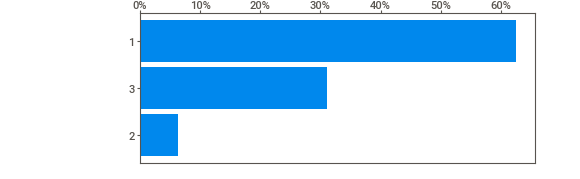
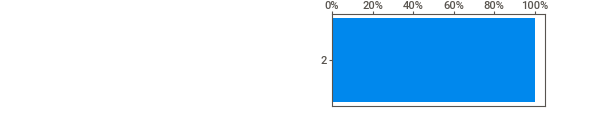
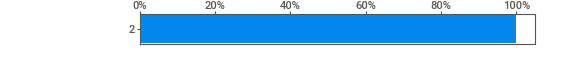
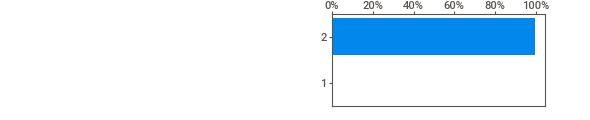
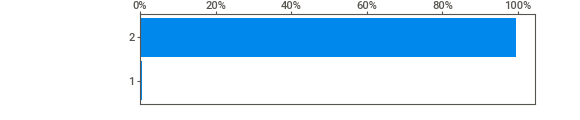
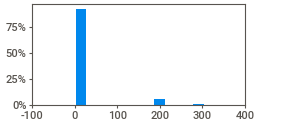
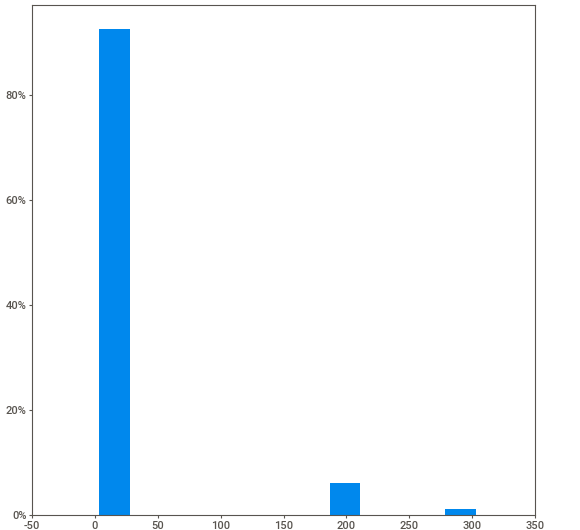
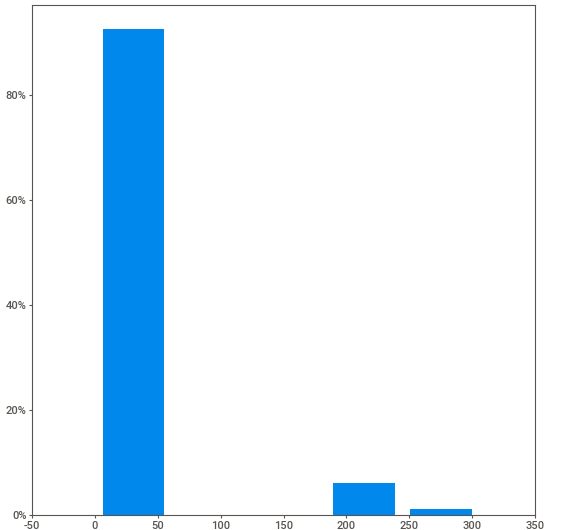
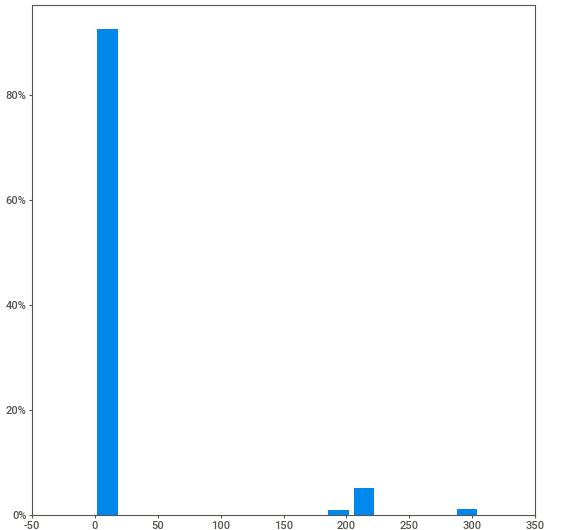
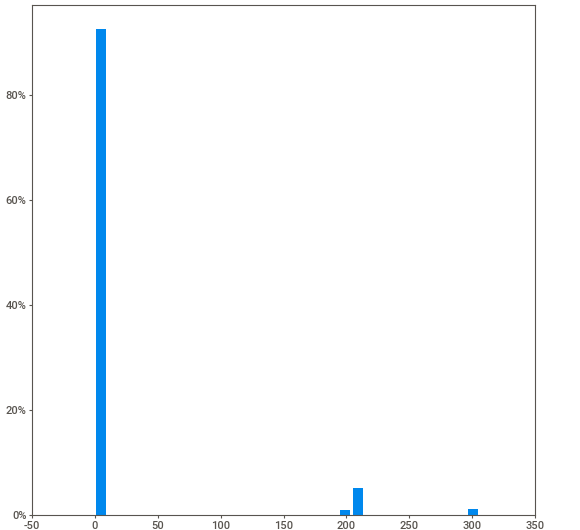
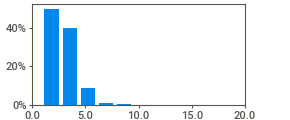
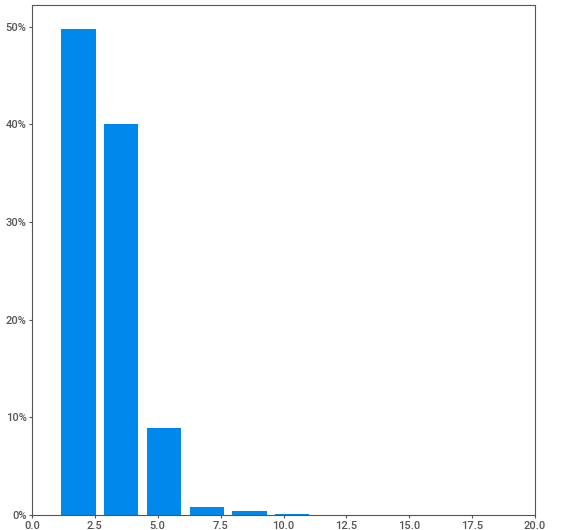
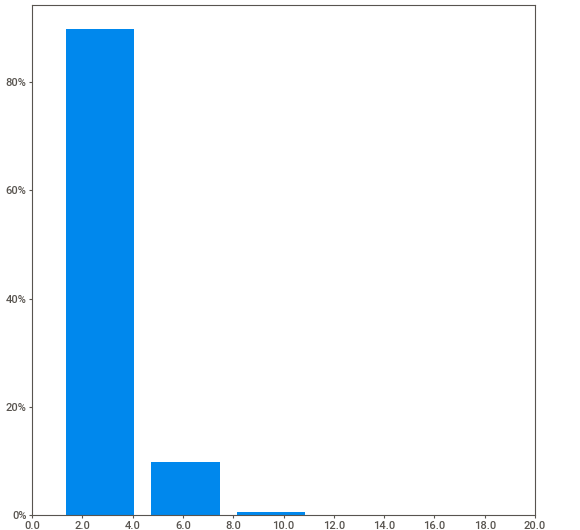
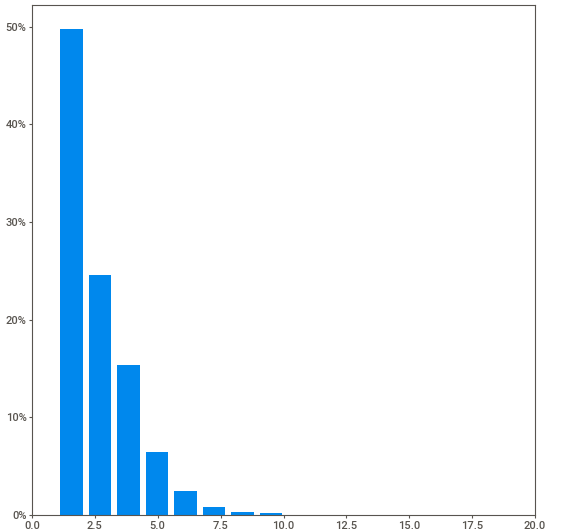
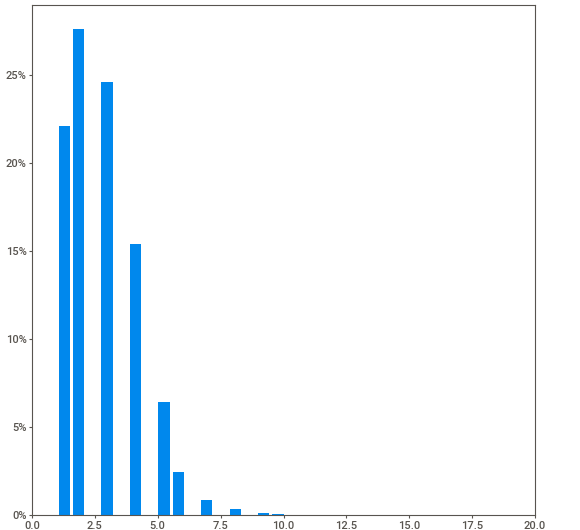
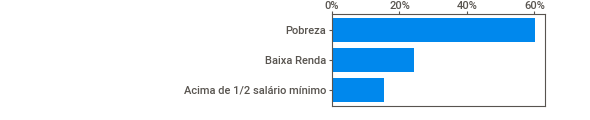
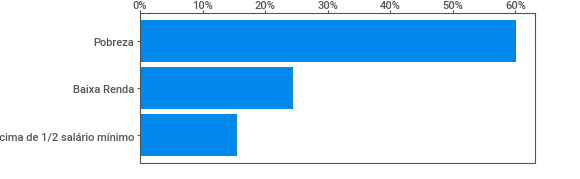
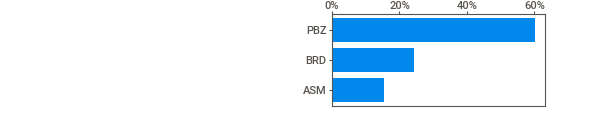
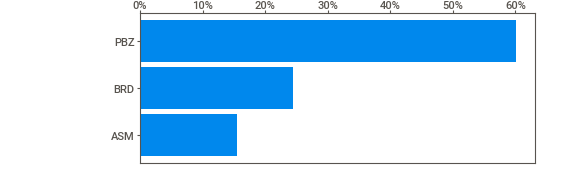
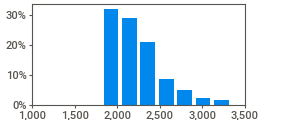
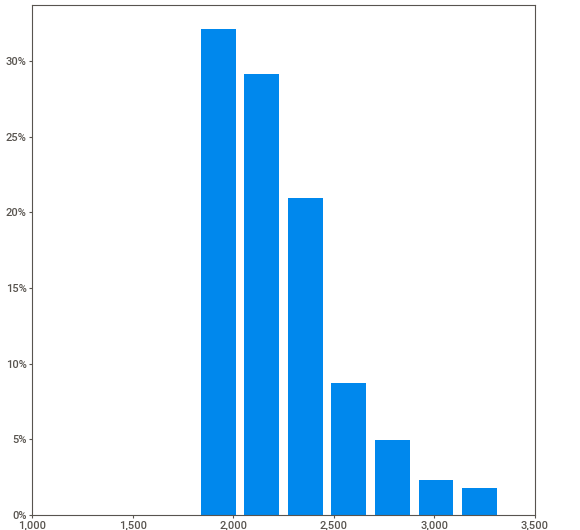
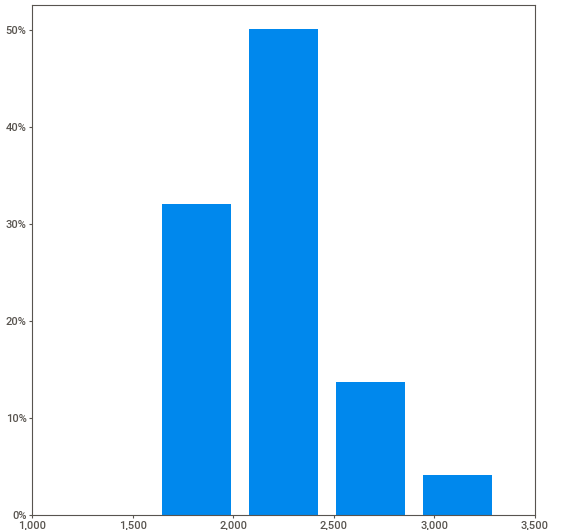
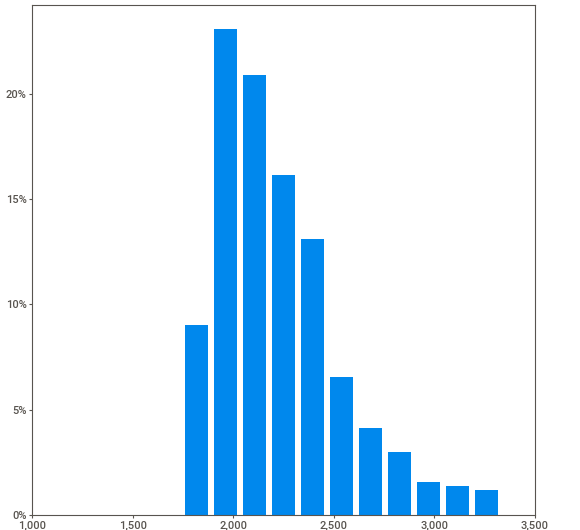
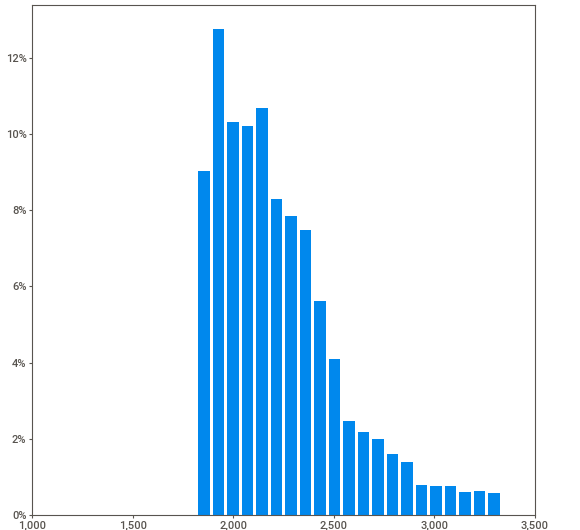
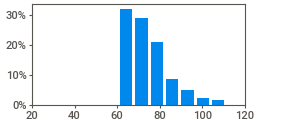
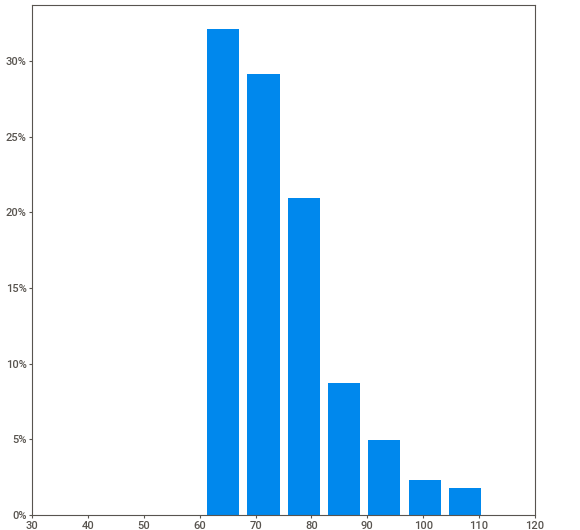
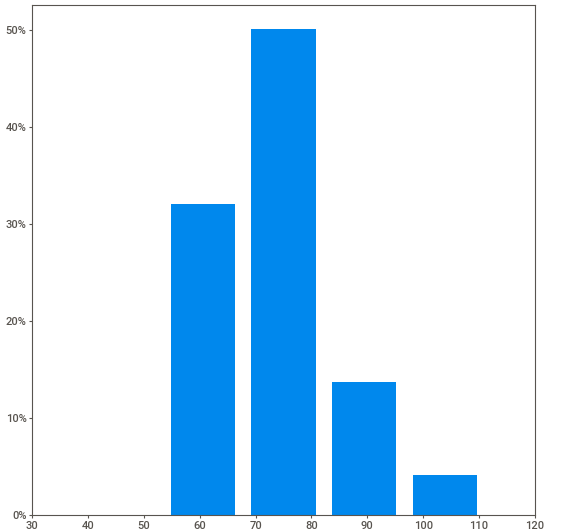
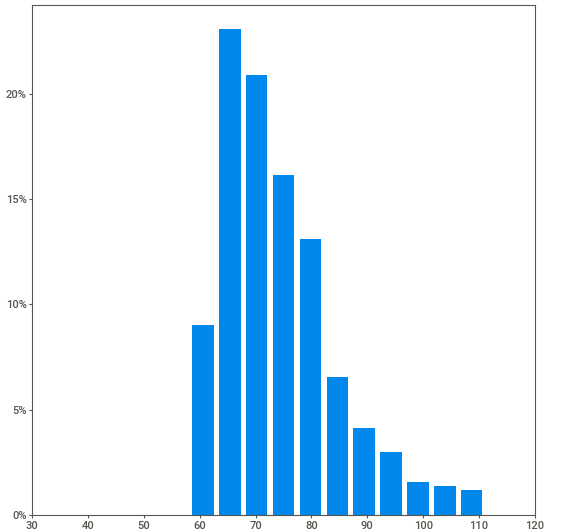
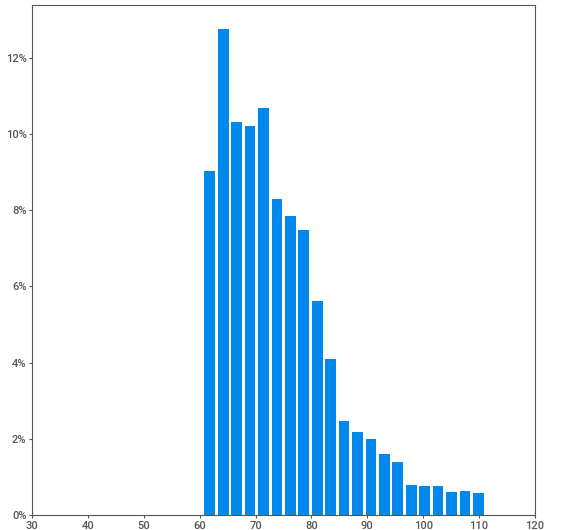
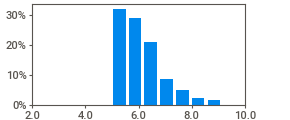
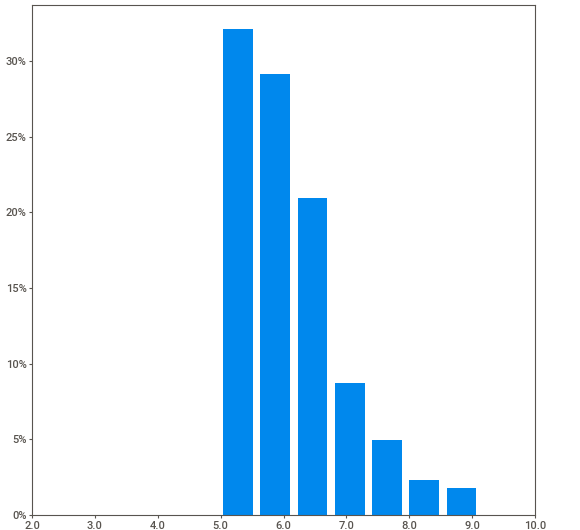
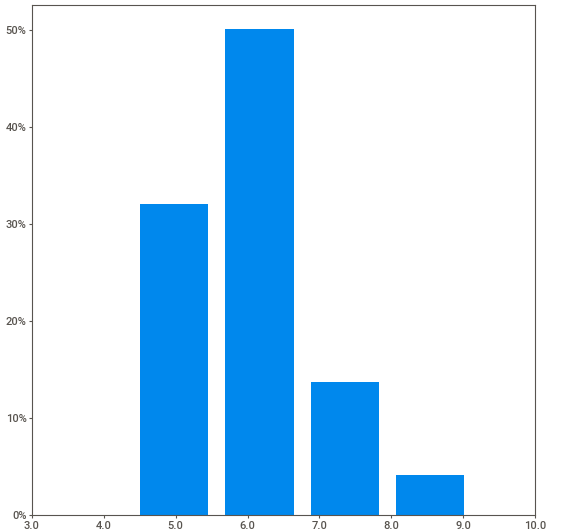
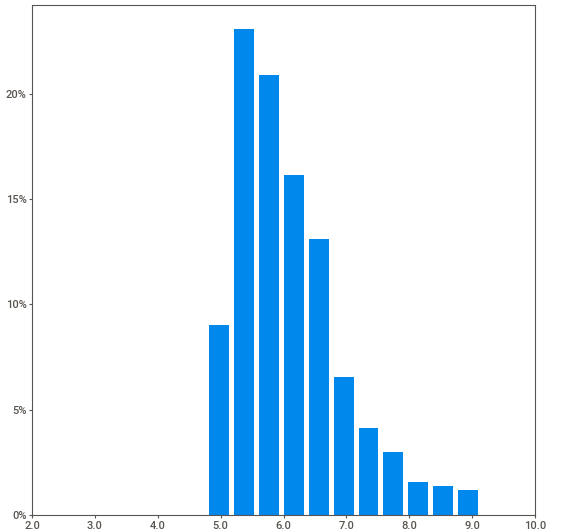
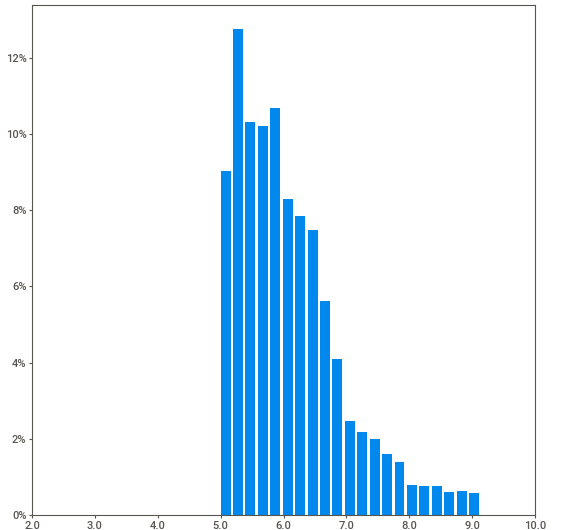
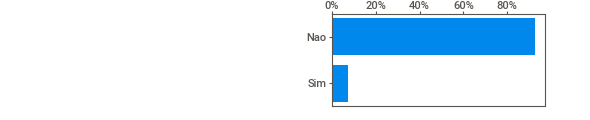
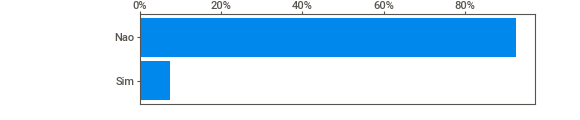
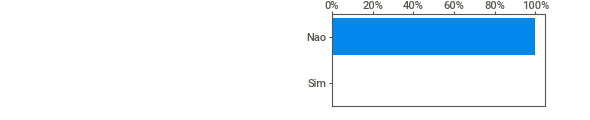
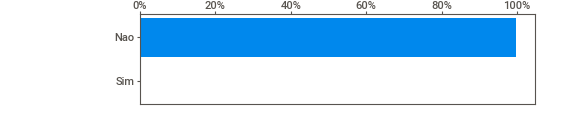
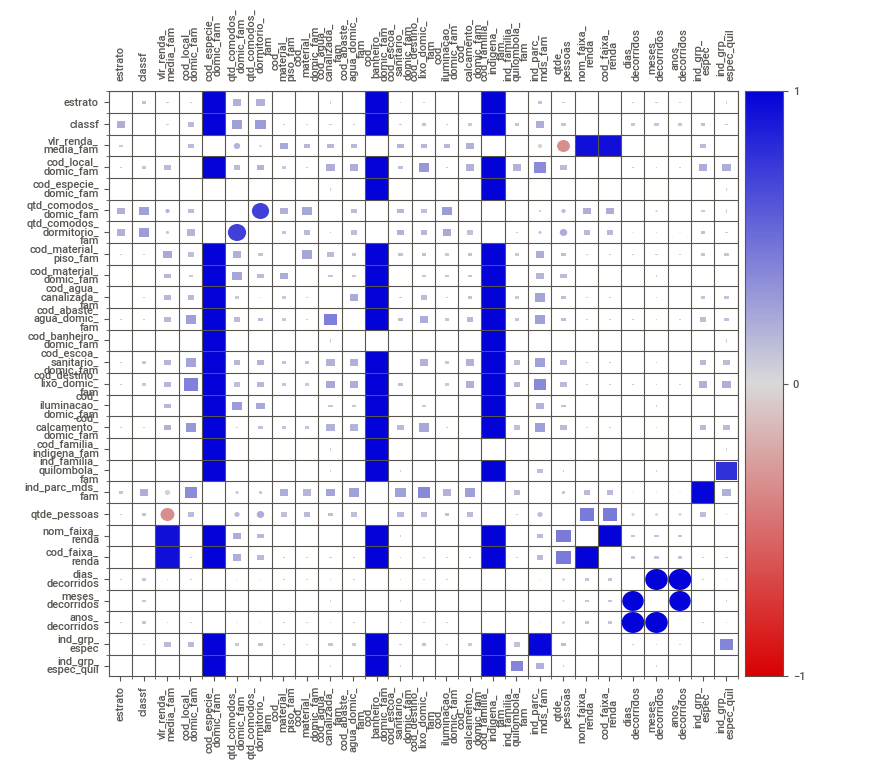
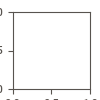

In [14]:
dados.show_notebook()

In [15]:
dados.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [290]:
def corr_spearman(df, lista_col, col_top, k):
    k = k # número de variáveis
    corrmat = abs(df[lista_col].corr(method='spearman')) # correlação de spearman
    cols = corrmat.nlargest(k, col_top).index # o k-ésimo maior valor
    cm = np.corrcoef(df[cols].values.T) # calcula a correlação
    
    sns.set(font_scale=1.0)
    f, ax = plt.subplots(figsize=(25, 10))
    
    mask = np.zeros_like(cm) 
    mask[np.triu_indices_from(mask)] = True 
    sns.set_style("white")
    hm = sns.heatmap(cm, cbar=True, 
                     annot=True, 
                     square=True, 
                     fmt='.2f',
                     annot_kws={'size': 10}, 
                     yticklabels=cols.values, 
                     xticklabels=cols.values, 
                     mask = mask)
    plt.show()
    return cm, cols, corrmat

In [284]:
l_col_num = df_fam.select_dtypes(include=['number']).columns.tolist()
l_col_num

['estrato',
 'classf',
 'vlr_renda_media_fam',
 'cod_local_domic_fam',
 'cod_especie_domic_fam',
 'qtd_comodos_domic_fam',
 'qtd_comodos_dormitorio_fam',
 'cod_material_piso_fam',
 'cod_material_domic_fam',
 'cod_agua_canalizada_fam',
 'cod_abaste_agua_domic_fam',
 'cod_banheiro_domic_fam',
 'cod_escoa_sanitario_domic_fam',
 'cod_destino_lixo_domic_fam',
 'cod_iluminacao_domic_fam',
 'cod_calcamento_domic_fam',
 'cod_familia_indigena_fam',
 'ind_familia_quilombola_fam',
 'ind_parc_mds_fam',
 'qtde_pessoas',
 'dias_decorridos',
 'meses_decorridos',
 'anos_decorridos']

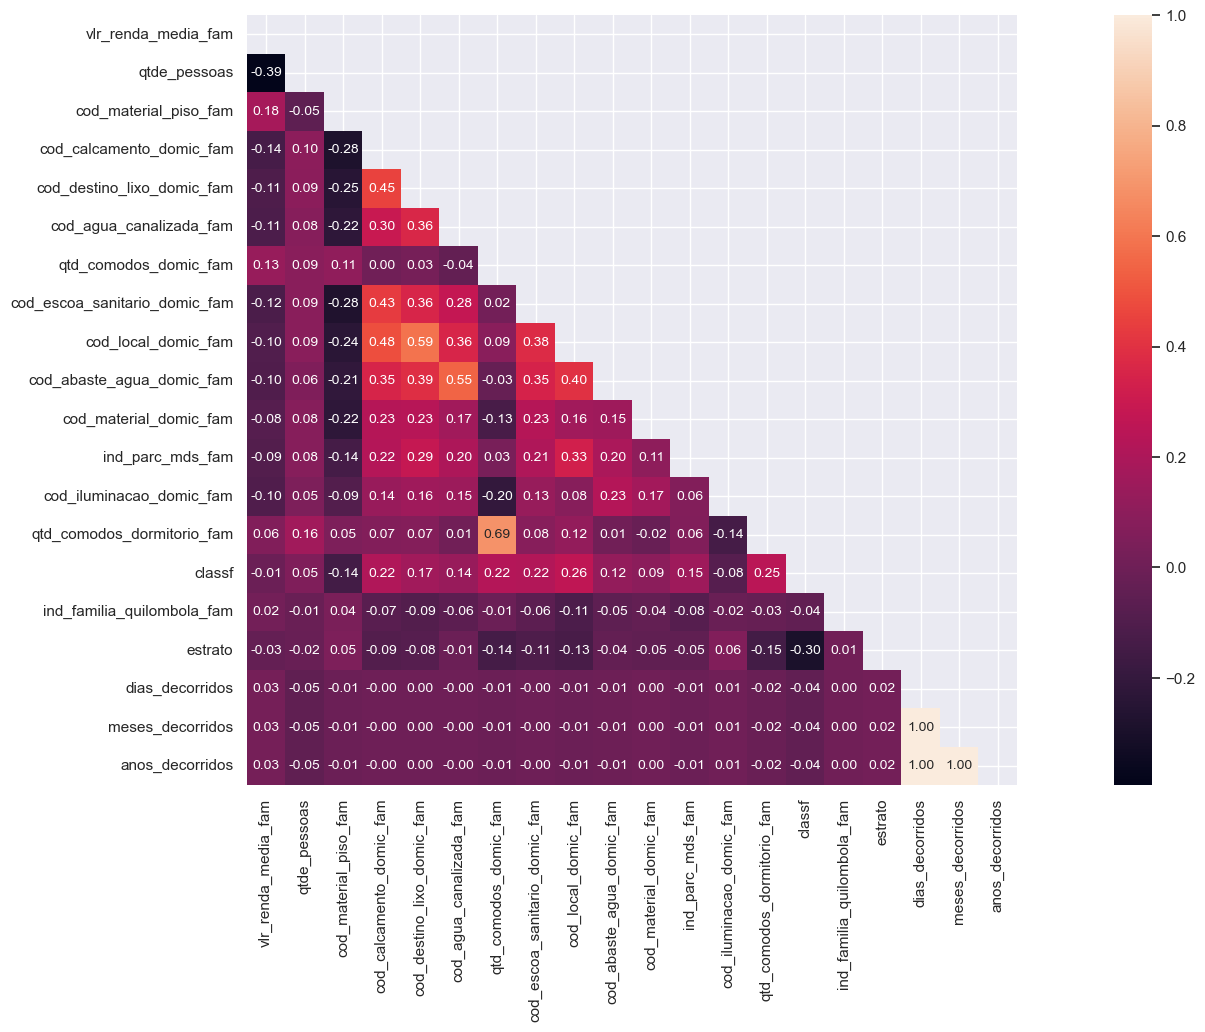

As maiores correlações: 


,Correlação
vlr_renda_media_fam,1.0000


In [291]:
k = 20 # the k largest correlations
col_top = 'vlr_renda_media_fam'
cm, cols, corrmat = corr_spearman(df_fam, l_col_num, col_top, k)

result = pd.DataFrame(cm[0],cols, columns=['Correlação'])
print('As maiores correlações: ')
result[np.abs(result['Correlação'])>0.5].sort_values(by='Correlação', ascending=False)

In [293]:
l_col_num = l_col_num + ['nom_faixa_renda']

k = 20 # the k largest correlations
col_top = 'nom_faixa_renda'
cm, cols, corrmat = corr_spearman(df_fam, l_col_num, col_top, k)

result = pd.DataFrame(cm[0],cols, columns=['Correlação'])
print('As maiores correlações: ')
result[np.abs(result['Correlação'])>0.5].sort_values(by='Correlação', ascending=False)

ValueError: could not convert string to float: 'Baixa Renda'

In [292]:
df_fam.columns

Index(['cd_ibge', 'estrato', 'classf', 'id_familia', 'dat_cadastramento_fam',
       'dat_alteracao_fam', 'vlr_renda_media_fam', 'dat_atualizacao_familia',
       'cod_local_domic_fam', 'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'qtde_pessoas', 'cod_faixa_renda',
       'nom_faixa_renda', 'dias_decorridos', 'meses_decorridos',
       'anos_decorridos', 'ind_grp_espec', 'ind_grp_espec_quil'],
      dtype='object')

In [24]:
checar_df(df_pess)

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12852599 entries, 0 to 12852598
Data columns (total 35 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   cd_ibge                           object
 1   estrato                           object
 2   classf                            object
 3   id_familia                        object
 4   id_pessoa                         object
 5   cod_sexo_pessoa                   object
 6   idade                             object
 7   cod_parentesco_rf_pessoa          object
 8   cod_raca_cor_pessoa               object
 9   cod_local_nascimento_pessoa       object
 10  cod_certidao_registrada_pessoa    object
 11  cod_deficiencia_memb              object
 12  cod_sabe_ler_escrever_memb        object
 13  ind_frequenta_escola_memb         object
 14  cod_escola_local_memb             object
 15  cod_curso_frequenta_memb          object
 16  cod_ano_serie_frequenta_m

,Contagem Unicos
cd_ibge,5534
classf,3
cod_afastado_trab_memb,2
cod_agricultura_trab_memb,2
cod_ano_serie_frequenta_memb,10
cod_ano_serie_frequentou_memb,10
cod_certidao_registrada_pessoa,4
cod_concluiu_frequentou_memb,2
cod_curso_frequenta_memb,14
cod_curso_frequentou_pessoa_memb,15


Número de valores nulos:


,Contagem Nulos
cd_ibge,0
classf,0
cod_afastado_trab_memb,7138988
cod_agricultura_trab_memb,10015482
cod_ano_serie_frequenta_memb,9347941
cod_ano_serie_frequentou_memb,6498619
cod_certidao_registrada_pessoa,0
cod_concluiu_frequentou_memb,6498384
cod_curso_frequenta_memb,8473736
cod_curso_frequentou_pessoa_memb,6173568
